In [60]:
import json
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
from sklearn import metrics

from epilepsypcm.utils.make_df import make_df, get_df_list, concat_dfs
from epilepsypcm.utils.outcome_params import engel_score

In [120]:
#Location
base_path = '/Users/david/Desktop/PCM_Data/' #modify for your file location


#Function to get a list of all dataframes for all positive patients, in the format [patient number, df]
df_list = get_df_list(base_path, "1")

#Code to loop through this list
#for i in range(len(df_list)):
#    print("Patient ID: ", df_list[i][0])
#    print("Patient Dataframe: ", df_list[i][1].head(3))


    
#Function to get the concatenated dataframe for all positive patients
## balance parameter can be changed to "None", "upsample", or "downsample"
all_positive_patients = concat_dfs(base_path, "1", balance = "downsample")

#print("Full Dataframe: ", all_positive_patients.head(3))

/Users/david/Documents/GitHub/epilepsypcm/epilepsypcm/utils/make_df.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["outcome"][df["chNames"] == channel] = 1


In [138]:
all_positive_patients

,chNames,significant,n1Zscore,n2Zscore,p2Zscore,n1Latency,n2Latency,p2Latency,flipped,outcome
1079,RPHG03_RPHG04,1.0,-25.844707,-11.574456,24.883021,39.0,121.0,59.0,0.0,0.0
1301,RA10_RA11,0.0,-2.364876,-4.669449,5.657711,101.0,631.0,426.0,0.0,0.0
3104,ALS01_ALS02,0.0,2.711632,1.142021,0.032649,15.0,101.0,77.0,1.0,0.0
1618,LOF12_LOF13,0.0,-2.196629,-0.391798,1.775902,11.0,157.0,140.0,0.0,0.0
966,LIN02_LIN03,0.0,1.493684,1.763983,-1.565146,11.0,315.0,75.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
659,RATI7_RATI8,0.0,2.439135,4.333462,-4.537356,16.0,286.0,79.0,1.0,1.0
663,RATI12_RATI13,1.0,-6.097983,-20.935780,8.688790,39.0,172.0,77.0,0.0,1.0
664,RATI13_RATI14,0.0,3.517818,28.552546,-11.088209,16.0,160.0,70.0,1.0,1.0
665,RATI14_RATI15,0.0,2.019353,8.722130,-6.228059,18.0,169.0,81.0,1.0,1.0


In [122]:
all_positive_patients.to_csv('/Users/david/Desktop/data.csv')

In [123]:
from sklearn.model_selection import train_test_split

# drop certain columns and get X and Y
X = all_positive_patients.drop(['chNames','outcome','significant','flipped'], axis=1)
Y = all_positive_patients['outcome']

# run test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)

In [124]:
X

,n1Zscore,n2Zscore,p2Zscore,n1Latency,n2Latency,p2Latency
1079,-25.844707,-11.574456,24.883021,39.0,121.0,59.0
1301,-2.364876,-4.669449,5.657711,101.0,631.0,426.0
3104,2.711632,1.142021,0.032649,15.0,101.0,77.0
1618,-2.196629,-0.391798,1.775902,11.0,157.0,140.0
966,1.493684,1.763983,-1.565146,11.0,315.0,75.0
...,...,...,...,...,...,...
659,2.439135,4.333462,-4.537356,16.0,286.0,79.0
663,-6.097983,-20.935780,8.688790,39.0,172.0,77.0
664,3.517818,28.552546,-11.088209,16.0,160.0,70.0
665,2.019353,8.722130,-6.228059,18.0,169.0,81.0


In [125]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[['n1Zscore','n2Zscore','p2Zscore','n1Latency','n2Latency','p2Latency']]=scaler.fit_transform(X_train[['n1Zscore','n2Zscore','p2Zscore','n1Latency','n2Latency','p2Latency']])

In [126]:
# Importing libraries to build the moddel
import statsmodels.api as sm

# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res1 = logm1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                outcome   No. Observations:                 4531
Model:                            GLM   Df Residuals:                     4524
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3132.2
Date:                Mon, 06 Dec 2021   Deviance:                       6264.4
Time:                        22:46:03   Pearson chi2:                 4.53e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.003703
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0085      0.030      0.286      0.775      -0.050       0.067
n1Zscore       0.0115      0.041      0.282      0.778      -0.068       0.091
n2Zscore       0.0318      0.039      0.812      0.417      -0.045       0.109
p2Zscore       0.0481      0.033      1.441      0.150      -0.017       0.114
n1Latency      0.1222      0.033      3.726      0.000       0.058       0.186
n2Latency     -0.0308      0.046     -0.676      0.499      -0.120       0.058
p2Latency     -0.0096      0.045     -0.214      0.831      -0.097       0.078
==============================================================================
"""

In [127]:
X_train_final = sm.add_constant(X_train)

y_train_pred = res1.predict(X_train_final)
y_train_pred_final = pd.DataFrame({'EZ':y_train.values, 'EZ_Prob':y_train_pred})
y_train_pred_final['NodeID'] = y_train.index
y_train_pred_final.head()

,EZ,EZ_Prob,NodeID
1673,1.0,0.522855,1673
122,0.0,0.543545,122
1075,0.0,0.537857,1075
15,1.0,0.498547,15
1813,1.0,0.473904,1813


In [128]:
# find best probability
accuracy = []
for i in np.arange(0,1,0.0001):
    y_train_pred_final['predicted'] = y_train_pred_final.EZ_Prob.map(lambda x: 1 if x > i else 0)
    accuracy.append(metrics.accuracy_score(y_train_pred_final.EZ, y_train_pred_final.predicted))
best_pro_index = accuracy.index(max(accuracy))

In [134]:
# Creating new column 'predicted' 
y_train_pred_final['predicted'] = y_train_pred_final.EZ_Prob.map(lambda x: 1 if x > (best_pro_index/10000) else 0)

# Let's see the dataframe
y_train_pred_final.head(10)

,EZ,EZ_Prob,NodeID,predicted
1673,1.0,0.522855,1673,1
122,0.0,0.543545,122,1
1075,0.0,0.537857,1075,1
15,1.0,0.498547,15,0
1813,1.0,0.473904,1813,0
240,0.0,0.530637,240,1
169,0.0,0.484184,169,0
1076,1.0,0.502205,1076,0
257,1.0,0.533372,257,1
895,0.0,0.533934,895,1


Accuracy on the test set is 0.5296843963804899
AUC is 0.530870742732445


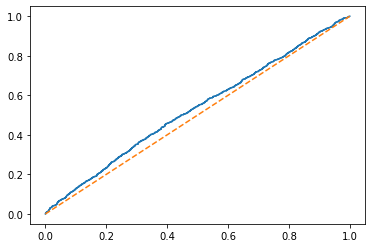

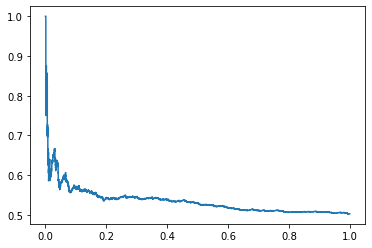

In [135]:
# caculate the accuracy
print('Accuracy on the test set is',metrics.accuracy_score(y_train_pred_final.EZ, y_train_pred_final.predicted))
# ROC Curve and auc value

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred)
roc_auc = metrics.auc(fpr,tpr)

precision,recall,threshold = metrics.precision_recall_curve(y_train, y_train_pred)

plt.figure()
plt.plot(fpr,tpr,label = 'ROC curve')
plt.plot([0,1],[0,1],linestyle = '--')
plt.figure()
plt.plot(recall,precision)

print('AUC is', roc_auc)

Accuracy on the test set is 0.526919682259488
AUC of the test set is 0.5204156692599242


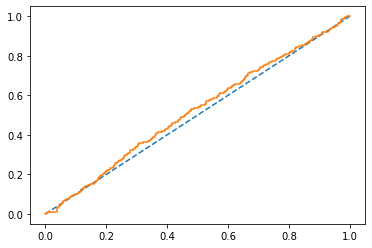

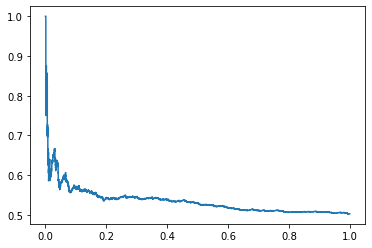

In [136]:
# try on the test set
X_test[['n1Zscore','n2Zscore','p2Zscore','n1Latency','n2Latency','p2Latency']]=scaler.fit_transform(X_test[['n1Zscore','n2Zscore','p2Zscore','n1Latency','n2Latency','p2Latency']])
X_test = sm.add_constant(X_test)

y_test_pred = res1.predict(X_test)
y_test_pred_final = pd.DataFrame({'EZ':y_test.values, 'EZ_Prob':y_test_pred})
y_test_pred_final['NodeID'] = y_test.index

# find best probability
accuracy = []
for i in np.arange(0,1,0.0001):
    y_test_pred_final['predicted'] = y_test_pred_final.EZ_Prob.map(lambda x: 1 if x > i else 0)
    accuracy.append(metrics.accuracy_score(y_test_pred_final.EZ, y_test_pred_final.predicted))
best_pro_index = accuracy.index(max(accuracy))

# Creating new column 'predicted' 
y_test_pred_final['predicted'] = y_test_pred_final.EZ_Prob.map(lambda x: 1 if x > (best_pro_index/10000) else 0)

print('Accuracy on the test set is',metrics.accuracy_score(y_test_pred_final.EZ, y_test_pred_final.predicted))

# ROC Curve and auc value for the test set

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred)
roc_auc = metrics.auc(fpr,tpr)

plt.figure()
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,label = 'ROC curve')
plt.figure()
plt.plot(recall,precision)

print('AUC of the test set is', roc_auc)